## Basic Linear Predictor

In [188]:
import torch
from matplotlib import pyplot as plt
from functools import partial

def score(w, x):
  return torch.dot(w, x)

About the score:
- The **score** is the simplest form of a linear predictor
- Returns the dot product of the weights `w` and the input feature vector `x`, like a line passing through `(0, 0)` but N-dimensional

## Linear Classification

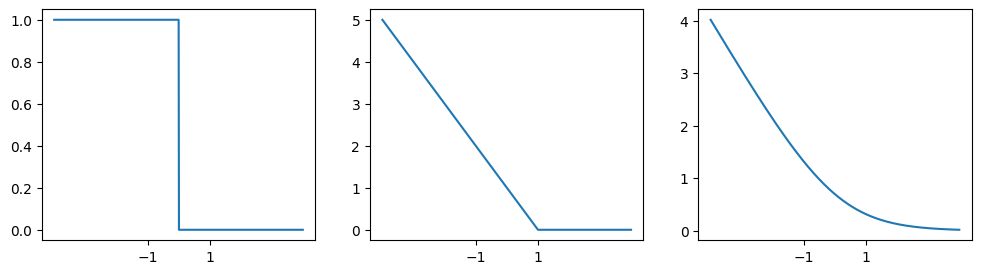

In [189]:
# Classifier model
def linear_classifier(w):
  return partial(lambda w, x: torch.sign(score(x, w)), w)

# Error function
def margin(x, y, w):
  return score(x, w) * y

# Loss functions
def zero_one_loss(x, y, w):
  return torch.le(margin(x, y, w), 0)
def hinge_loss(x, y, w):
  m = margin(x, y, w)
  return torch.maximum(1 - m, torch.zeros_like(m))
def logistic_loss(x, y, w):
  return torch.log(1 + torch.exp(-margin(x, y, w)))

# Plotting loss functions
def plot_loss(loss):
  x, y, w = torch.tensor([1]), torch.arange(-4, 4, 0.01), torch.tensor([1])
  plt.xticks([0, 1])
  plt.plot(y, loss(x, y, w))

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plot_loss(zero_one_loss)
plt.subplot(1, 3, 2)
plot_loss(hinge_loss)
plt.subplot(1, 3, 3)
plot_loss(logistic_loss)
plt.show()

About classification:
- All `y` assumes one of `{-1, 1}`, meaning a negative or positive result, respectively
- For clarification:
  - The score can still be any real number
  - But the output of the model and the expected result both need to be one of `{-1, 1}`
- "Categorical", "discrete"

About the model:
- The model itself is called the **linear classifier** and returns the sign of the score

About the error:
- The error of the model is called the **margin** and returns the product of the score and the expected result
- Higher values are better, since they represent both the result and the expected result "agreeing" on a sign by a certain magnitude

About the loss:
- The loss of the model can be defined using:
  1. **Zero-one loss**: only penalizes the model for predicting incorrectly
  2. **Hinge loss**: takes into account accuracy *and* confidence
  3. **Logistic loss**: a smoother version of hinge loss

## Linear Regression

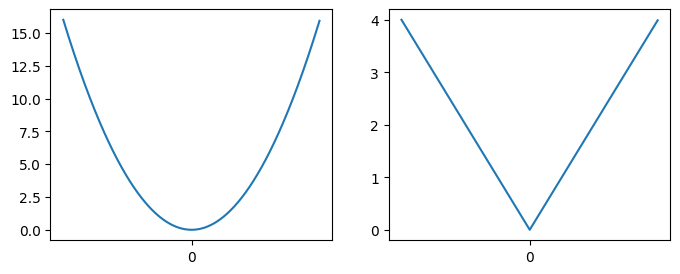

In [190]:
# Regression model
def linear_regression(w):
  return partial(lambda w, x: score(x, w), w)

# Error function
def residual(x, y, w):
  return linear_regression(w)(x) - y

# Loss function
def squared_loss(x, y, w):
  return torch.pow(residual(x, y, w), 2)
def absolute_deviation_loss(x, y, w):
  return torch.abs(residual(x, y, w))

# Plotting loss functions
def plot_loss(loss):
  x, y, w = torch.tensor([0]), torch.arange(-4, 4, 0.01), torch.tensor([0])
  plt.xticks([0])
  plt.plot(y, loss(x, y, w))

plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plot_loss(squared_loss)
plt.subplot(1, 2, 2)
plot_loss(absolute_deviation_loss)
plt.show()

About regression:
- Unlike its classification counterpart, `y` can take on any real number
- "Quantitative", "continuous"

About the model:
- The model is called **linear regression** and is equivalent to calculating the score

About the error:
- The error of the model is called the **residual** and returns the difference between the result and the expected result
- Residuals closer to zero are better, as it represents being less off from the target

About the loss:
- The loss of the model can be defined using:
  1. **Squared loss**: penalizes the model less for being close
  2. **Absolute deviation loss**: penalizes the model simply by how far off it is
- Note that the losses are always symmetric about `residual = 0`